In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# All the available style in matplotlib pyplot
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
import warnings
warnings.simplefilter(action='ignore')

In [5]:
import plotly.express as px

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head()

id    brand          model  model_year  milage fuel_type  \
0   0     Ford   F-150 Lariat        2018   74349  Gasoline   
1   1      BMW          335 i        2007   80000  Gasoline   
2   2   Jaguar      XF Luxury        2009   91491  Gasoline   
3   3      BMW   X7 xDrive40i        2022    2437    Hybrid   
4   4  Pontiac  Firebird Base        2001  111000  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col       accident clean_title  \
0                    10-Speed A/T    Blue    Gray  None reported         Yes   
1                     6-Speed M/T   Black   Black  None reported         Yes   
2                     6-Speed A/T  Purple   Beige  None reported         Yes   
3  Transmission w/Dual Shift Mode    Gray   Brown  None reported         Yes   
4                             A/T   White   Black  None reported         Yes   

   price  
0  11000  
1   8250  
2  15000  
3  63500  
4   7850

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [9]:
df.set_index('id', inplace = True)

In [10]:
df['clean_title'].value_counts()

clean_title
Yes    54273
Name: count, dtype: int64

In [11]:
# Dropping column clean_title because it is not impacting the data and all values are same ('YES').
df.drop(columns = ['clean_title'], inplace = True)

In [12]:
df

brand                             model  model_year  milage  \
id                                                                     
0         Ford                      F-150 Lariat        2018   74349   
1          BMW                             335 i        2007   80000   
2       Jaguar                         XF Luxury        2009   91491   
3          BMW                      X7 xDrive40i        2022    2437   
4      Pontiac                     Firebird Base        2001  111000   
...        ...                               ...         ...     ...   
54268      BMW                      X6 xDrive50i        2017   29000   
54269     Audi                   A4 2.0T Premium        2015   94634   
54270  Porsche                         Cayenne S        2013   40989   
54271  Porsche                 911 Carrera 4 GTS        2023    1518   
54272     Audi  A5 Sportback S line Premium Plus        2021   35000   

           fuel_type                                             engine  \
id                                                                        
0           Gasoline      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1           Gasoline  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2           Gasoline       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3             Hybrid  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4           Gasoline      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
...              ...                                                ...   
54268       Gasoline       445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel   
54269  E85 Flex Fuel  220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...   
54270       Gasoline      420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel   
54271       Gasoline                               4.0L H6 24V GDI DOHC   
54272         Hybrid  261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...   

                            transmission ext_col int_col  \
id                                                         
0                           10-Speed A/T    Blue    Gray   
1                            6-Speed M/T   Black   Black   
2                            6-Speed A/T  Purple   Beige   
3         Transmission w/Dual Shift Mode    Gray   Brown   
4                                    A/T   White   Black   
...                                  ...     ...     ...   
54268                        8-Speed A/T   White   Brown   
54269                        6-Speed A/T   Black   Black   
54270     Transmission w/Dual Shift Mode   White   Black   
54271  8-Speed Automatic with Auto-Shift   Beige   Brown   
54272                        8-Speed A/T   Black   Black   

                                     accident   price  
id                                                     
0                               None reported   11000  
1                               None reported    8250  
2                               None reported   15000  
3                               None reported   63500  
4                               None reported    7850  
...                                       ...     ...  
54268                           None reported   29000  
54269  At least 1 accident or damage reported    6500  
54270  At least 1 accident or damage reported   18950  
54271                           None reported  194965  
54272                           None reported   37499  

[54273 rows x 11 columns]

In [13]:
df[['milage', 'price']].describe()

milage         price
count   54273.000000  5.427300e+04
mean    72746.175667  3.921844e+04
std     50469.490448  7.282634e+04
min       100.000000  2.000000e+03
25%     32268.000000  1.550000e+04
50%     66107.000000  2.800000e+04
75%    102000.000000  4.500000e+04
max    405000.000000  2.954083e+06

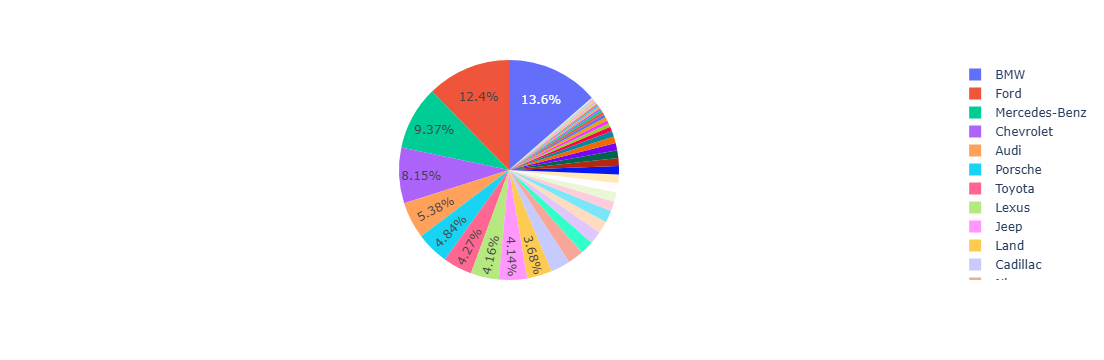

In [14]:
brand_pie = px.pie(df['brand'].value_counts(), values = df['brand'].value_counts().values , names = df['brand'].value_counts().index)
brand_pie.update_traces(textposition='inside')
brand_pie.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
brand_pie.show()

In [15]:
# Milage is the total number of miles a car has covered in its lifetime. Therefore the least the milage, the newer the car.
df.sort_values('milage').head(10)

brand                        model  model_year  milage  \
id                                                                      
4285           Lexus                  LS 460 Base        2016     100   
10648           Ford  Bronco Outer Banks Advanced        2022     100   
21305            GMC              Sierra 1500 AT4        2022     100   
26242  Mercedes-Benz      Sprinter 3500 High Roof        2021     105   
26022  Mercedes-Benz      Sprinter 3500 High Roof        2022     105   
37614  Mercedes-Benz      Sprinter 3500 High Roof        2021     105   
1038   Mercedes-Benz      Sprinter 3500 High Roof        2021     105   
33744  Mercedes-Benz      Sprinter 3500 High Roof        2021     105   
15145        Porsche                911 Carrera S        2017     105   
48090    Rolls-Royce                     Cullinan        2023     115   

      fuel_type                                             engine  \
id                                                                   
4285   Gasoline       386.0HP 4.6L 8 Cylinder Engine Gasoline Fuel   
10648  Gasoline      315.0HP 2.7L V6 Cylinder Engine Gasoline Fuel   
21305    Diesel  277.0HP 3.0L Straight 6 Cylinder Engine Diesel...   
26242  Gasoline        188.0HP 3.0L V6 Cylinder Engine Diesel Fuel   
26022  Gasoline         161.0HP 2.0L 4 Cylinder Engine Diesel Fuel   
37614    Diesel        188.0HP 3.0L V6 Cylinder Engine Diesel Fuel   
1038     Diesel         161.0HP 2.0L 4 Cylinder Engine Diesel Fuel   
33744    Diesel        188.0HP 3.0L V6 Cylinder Engine Diesel Fuel   
15145  Gasoline  400.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel   
48090  Gasoline                   6.7L V12 48V GDI DOHC Twin Turbo   

                         transmission ext_col      int_col       accident  \
id                                                                          
4285   Transmission w/Dual Shift Mode   White        Black  None reported   
10648                     8-Speed A/T    Gray        Brown  None reported   
21305                    10-Speed A/T     Red        Black  None reported   
26242                     7-Speed A/T   White        Black  None reported   
26022                     7-Speed A/T   Black       Orange  None reported   
37614                     7-Speed A/T   White        Black  None reported   
1038                      7-Speed A/T   Black       Orange  None reported   
33744                     7-Speed A/T   Black       Orange  None reported   
15145                     8-Speed A/T    Blue        Black  None reported   
48090               8-Speed Automatic       –  Grace White  None reported   

        price  
id             
4285   112000  
10648   62499  
21305   60000  
26242   33999  
26022  200000  
37614   38000  
1038   200000  
33744   69000  
15145   43000  
48090  175000

In [16]:
# Top 10 highest sold price.
df.sort_values('price', ascending = False).head(10)

brand                     model  model_year  milage fuel_type  \
id                                                                             
39761      Chevrolet         Suburban 1500 LTZ        2010  194000  Gasoline   
37341        Porsche            911 Carrera 4S        2005   28500  Gasoline   
41065      Chevrolet                  Tahoe LT        2017  117780  Gasoline   
19661           Audi      A7 3.0T Premium Plus        2017   54500    Diesel   
5584   Mercedes-Benz   SL-Class SL500 Roadster        2004    2533  Gasoline   
7849             GMC  Sierra 1500 SLE Crew Cab        2005  231500  Gasoline   
14389            GMC   Sierra 1500 SL Crew Cab        2006  231500  Gasoline   
7620       Chevrolet             Corvette Base        2005  231581  Gasoline   
34049          Acura           RDX PMC Edition        2021    2353  Gasoline   
29826         Toyota           Sequoia Limited        2002   17300  Gasoline   

                                                  engine        transmission  \
id                                                                             
39761       355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel                 A/T   
37341  355.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel         6-Speed M/T   
41065       355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel                 A/T   
19661                3.0L V6 Cylinder Engine Diesel Fuel         8-Speed A/T   
5584        302.0HP 5.0L 8 Cylinder Engine Gasoline Fuel                 A/T   
7849        355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel         4-Speed A/T   
14389       295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel                 A/T   
7620        400.0HP 6.0L 8 Cylinder Engine Gasoline Fuel         4-Speed A/T   
34049                         2.0L I4 16V GDI DOHC Turbo  10-Speed Automatic   
29826       381.0HP 5.7L 8 Cylinder Engine Gasoline Fuel                 A/T   

      ext_col int_col                                accident    price  
id                                                                      
39761  Silver   Black  At least 1 accident or damage reported  2954083  
37341    Gray   Black                           None reported  2954083  
41065   Black   Black                           None reported  2954083  
19661   Black   Brown  At least 1 accident or damage reported  2954083  
5584    White   Beige                           None reported  2954083  
7849      Red   Beige  At least 1 accident or damage reported  2954083  
14389     Red    Gray                           None reported  2954083  
7620     Gray   Beige                           None reported  2954083  
34049     Red   Ebony                           None reported  2954083  
29826  Silver    Gray  At least 1 accident or damage reported  2954083

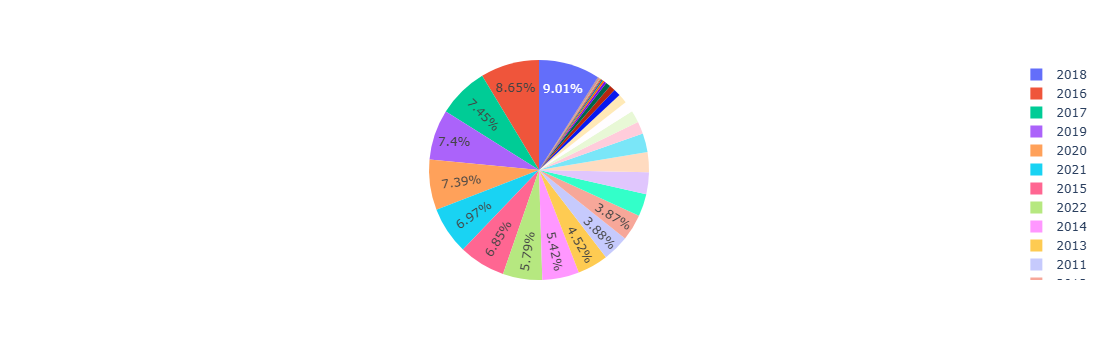

In [17]:
year_pie = px.pie(df['model_year'].value_counts(), values = df['model_year'].value_counts().values , names = df['model_year'].value_counts().index)
year_pie.update_traces(textposition='inside')
year_pie.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
year_pie.show()

In [18]:
# Some rows having exact same variable values but different prices. Therefore first dropped the 465 duplicate rows and then mergeged the price table.
df = df[['brand', 'model', 'model_year','milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col']].drop_duplicates().merge(df['price'], on='id')

In [19]:
df

brand                             model  model_year  milage  \
id                                                                     
0         Ford                      F-150 Lariat        2018   74349   
1          BMW                             335 i        2007   80000   
2       Jaguar                         XF Luxury        2009   91491   
3          BMW                      X7 xDrive40i        2022    2437   
4      Pontiac                     Firebird Base        2001  111000   
...        ...                               ...         ...     ...   
54268      BMW                      X6 xDrive50i        2017   29000   
54269     Audi                   A4 2.0T Premium        2015   94634   
54270  Porsche                         Cayenne S        2013   40989   
54271  Porsche                 911 Carrera 4 GTS        2023    1518   
54272     Audi  A5 Sportback S line Premium Plus        2021   35000   

           fuel_type                                             engine  \
id                                                                        
0           Gasoline      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1           Gasoline  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2           Gasoline       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3             Hybrid  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4           Gasoline      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   
...              ...                                                ...   
54268       Gasoline       445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel   
54269  E85 Flex Fuel  220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...   
54270       Gasoline      420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel   
54271       Gasoline                               4.0L H6 24V GDI DOHC   
54272         Hybrid  261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...   

                            transmission ext_col int_col   price  
id                                                                
0                           10-Speed A/T    Blue    Gray   11000  
1                            6-Speed M/T   Black   Black    8250  
2                            6-Speed A/T  Purple   Beige   15000  
3         Transmission w/Dual Shift Mode    Gray   Brown   63500  
4                                    A/T   White   Black    7850  
...                                  ...     ...     ...     ...  
54268                        8-Speed A/T   White   Brown   29000  
54269                        6-Speed A/T   Black   Black    6500  
54270     Transmission w/Dual Shift Mode   White   Black   18950  
54271  8-Speed Automatic with Auto-Shift   Beige   Brown  194965  
54272                        8-Speed A/T   Black   Black   37499  

[53808 rows x 10 columns]

In [20]:
df.fuel_type.value_counts()

fuel_type
Gasoline          49007
Hybrid             1757
E85 Flex Fuel      1467
Diesel             1098
–                   293
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64

In [21]:
df.engine.value_counts()

engine
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    1426
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             1112
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             1045
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel             976
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel              887
                                                         ... 
4.4 Liter GDI DOHC Twin Turbo                               1
120 AH                                                      1
321.0HP 3.0L V6 Cylinder Engine Gas/Electric Hybrid         1
3.0 Liter SC ULEV                                           1
1.3L I3 12V MPFI DOHC Turbo                                 1
Name: count, Length: 1061, dtype: int64

In [22]:
df.transmission.value_counts()

transmission
A/T                                                   16591
8-Speed A/T                                            7223
Transmission w/Dual Shift Mode                         6395
6-Speed A/T                                            5891
6-Speed M/T                                            3597
7-Speed A/T                                            3383
10-Speed A/T                                           2167
8-Speed Automatic                                      1184
5-Speed A/T                                            1176
9-Speed A/T                                            1061
4-Speed A/T                                             761
5-Speed M/T                                             713
CVT Transmission                                        687
10-Speed Automatic                                      638
6-Speed Automatic                                       514
Automatic                                               440
M/T                        

In [23]:
df.ext_col.value_counts()[df.ext_col.value_counts().index == '–']

ext_col
–    41
Name: count, dtype: int64

In [24]:
df.int_col.value_counts()[df.int_col.value_counts().index == '–']

int_col
–    1039
Name: count, dtype: int64

In [25]:
# Converting all '–' to Unknown
df['fuel_type'][df['fuel_type'] == '–'] = 'Unknown'
df['engine'][df['engine'] == '–'] = 'Unknown'
df['transmission'][df['transmission'] == '–'] = 'Unknown'
df['ext_col'][df['ext_col'] == '–'] = 'Unknown'
df['int_col'][df['int_col'] == '–'] = 'Unknown'

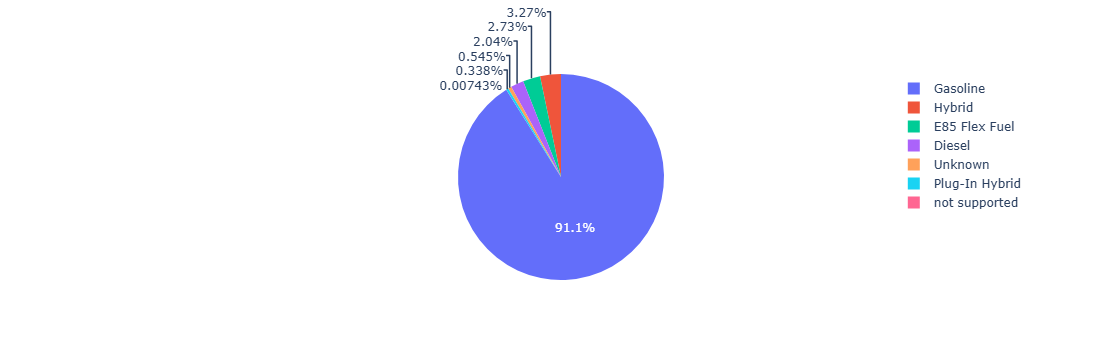

In [26]:
# Fuel type
fuel_pie = px.pie(df['fuel_type'].value_counts(), values = df['fuel_type'].value_counts().values , names = df['fuel_type'].value_counts().index)
fuel_pie.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fuel_pie.show()

(0.0, 3101687.15)

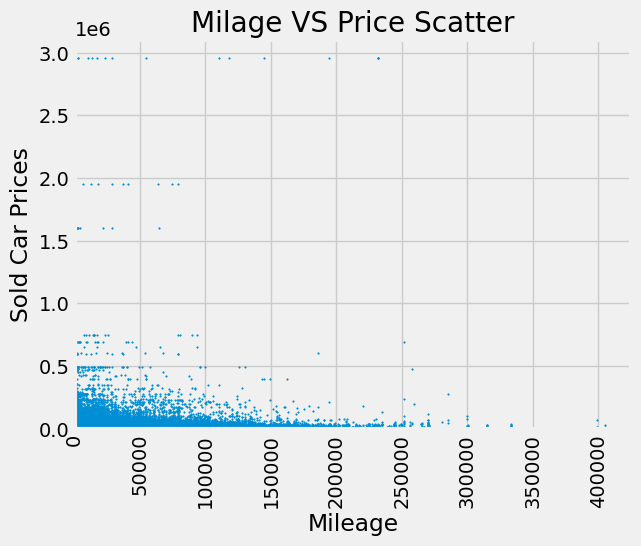

In [27]:
# PLotting scatter plot between milage and sold price of the cars
plt.scatter(df['milage'], df['price'], s = 1)
plt.title('Milage VS Price Scatter')
plt.xlabel('Mileage')
plt.ylabel('Sold Car Prices')
# To get unoverlapped x ticks
plt.xticks(rotation = 'vertical')

# To start plot from 0 not -ve values
plt.xlim(0)
plt.ylim(0)

(0.0, 150000.0)

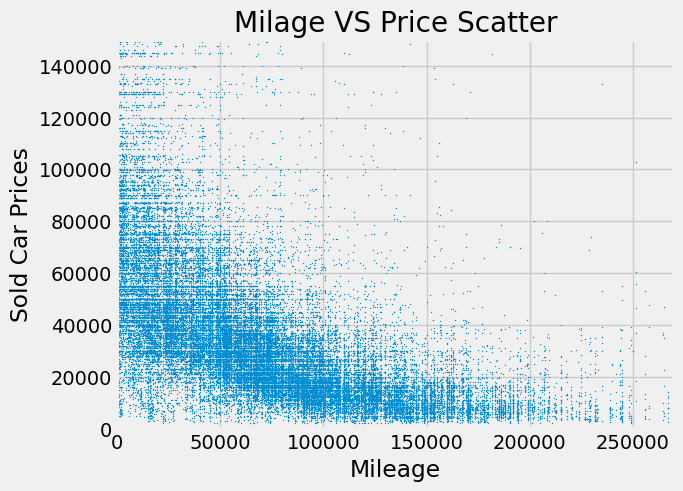

In [28]:
# As you can see the above scatter plot is very much concentrated in the left bottom corner.
# Therefore to get a general perspective, it is necessary to zoom in. And most suitable technique is ti limit the x and y axis
plt.scatter(df['milage'], df['price'], s = 0.2)
plt.title('Milage VS Price Scatter')
plt.xlabel('Mileage')
plt.ylabel('Sold Car Prices')

# Limiting the x and y axis
plt.xlim(0,270000)
plt.ylim(0,150000)

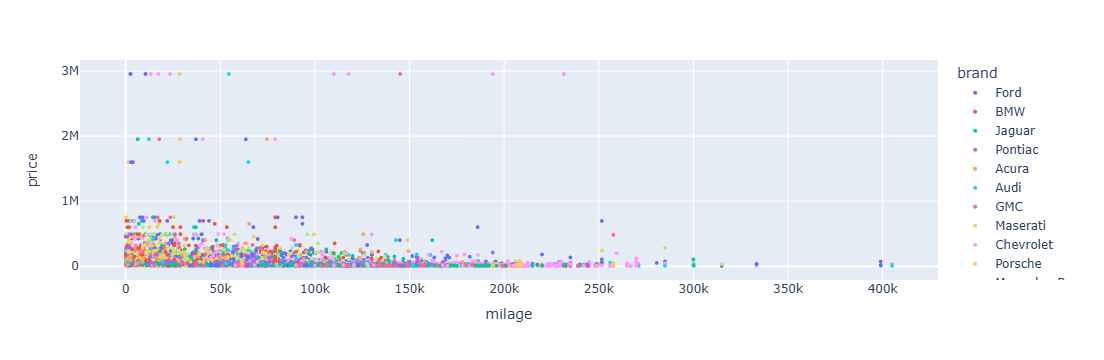

In [29]:
# This is more interactive and informative using plotly express scatter plot. The analysis gets more easier with it.
milvspri = px.scatter(df, x="milage", y="price", color = df['brand'])
milvspri.update_traces(marker={'size':4})
milvspri.show()

After something like 145k milage the price mostly ranges between 18k to 2.5k

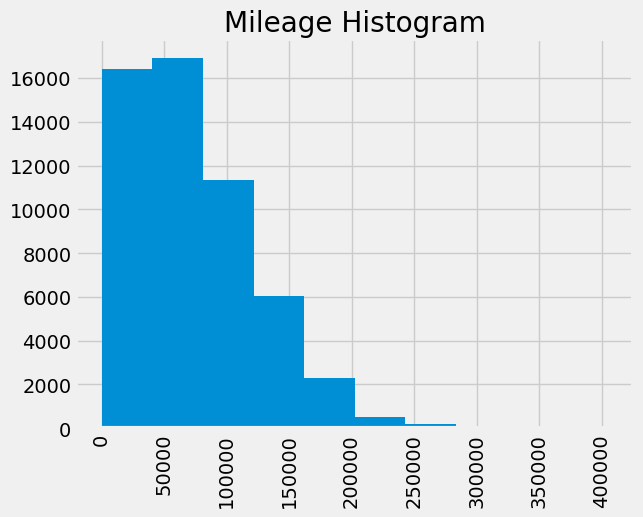

In [30]:
plt.hist(df['milage'])
plt.title('Mileage Histogram')
plt.xticks(rotation = 'vertical')
plt.show()

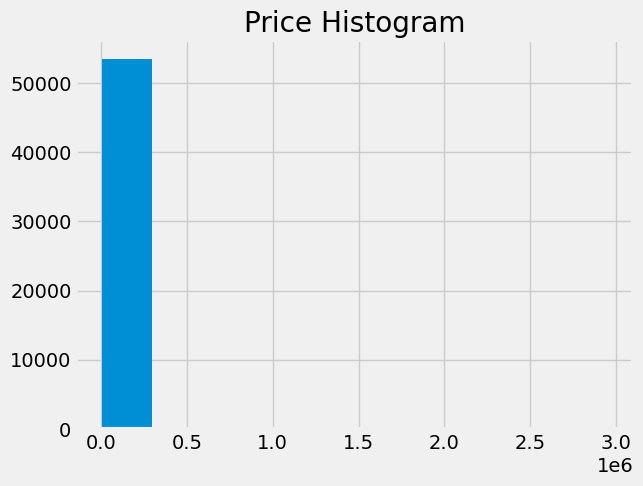

In [31]:
plt.hist(df['price'])
plt.title('Price Histogram')
plt.show()

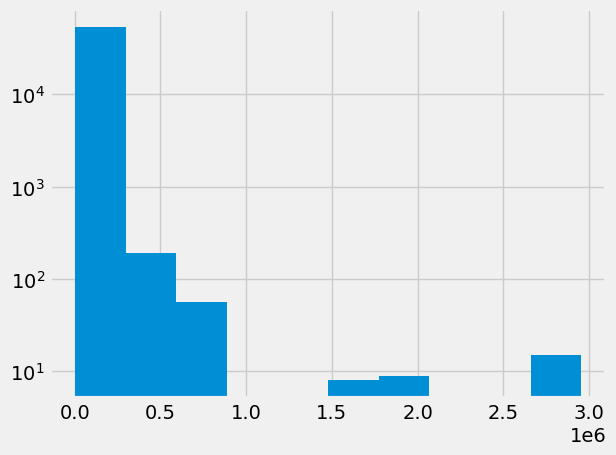

In [32]:
# As you can see, the price count of cars between 0 and 250000 is too much that other counts get neglected.
# To deal with this kind of situation log parameter is used.
plt.hist(df['price'], log = True)
plt.show()

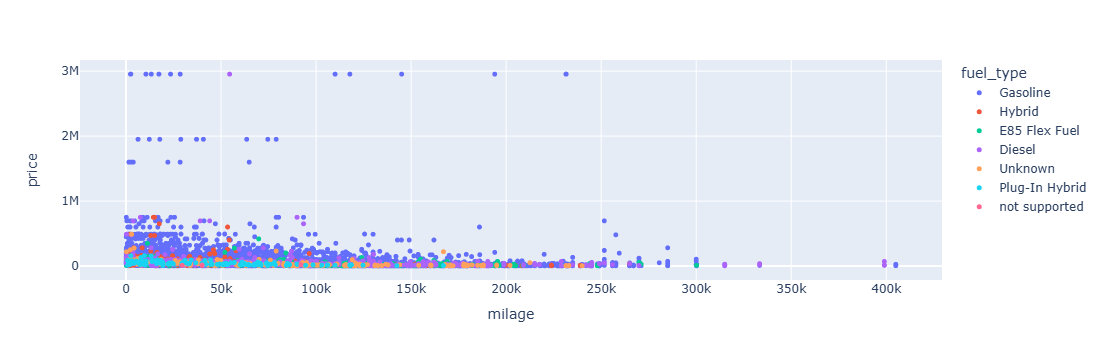

In [33]:
# This is more interactive and informative using plotly express scatter plot. The analysis gets more easier with it.
milvspri = px.scatter(df, x="milage", y="price", color = df['fuel_type'])
milvspri.update_traces(marker={'size':5})
milvspri.show()

Other tha Gasoline, mostly other fuel types have price range between 2k to under 280k

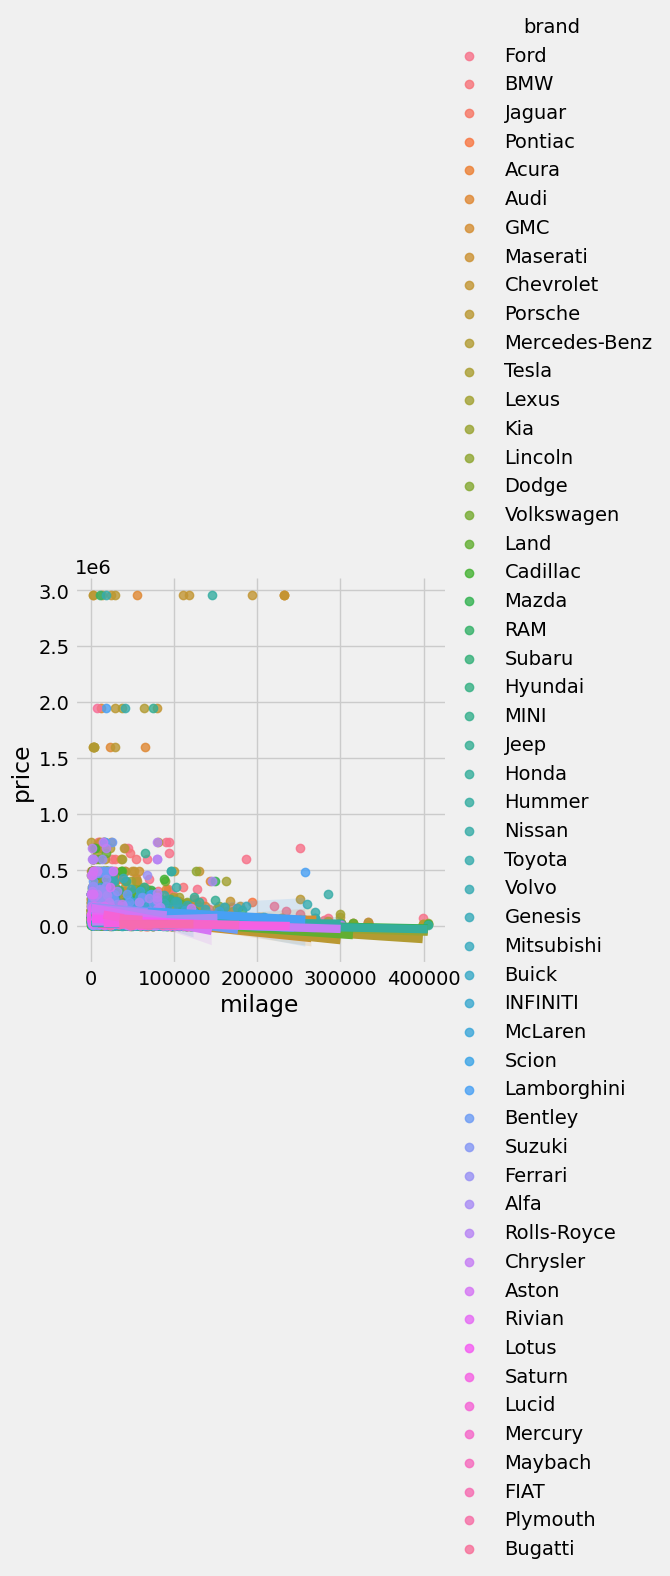

In [36]:
sns.lmplot(data = df, x='milage', y='price', hue='brand')

In [37]:
help(sns.lmplot)

Help on function lmplot in module seaborn.regression:

lmplot(data=None, *, x=None, y=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    com